## NBA UNSupervised Learning

In [2]:
import pandas as pd
import requests
import numpy as np
import plotly.express as pex
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from IPython.display import display
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, squareform

In [3]:
static_url='https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2022-23&SeasonType=Regular%20Season&StatCategory=PTS'

In [4]:
def web_scraping():
   
    request_header={
        'Accept': '*/*',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language' : 'en-US,en;q=0.9',
        'Connection':'keep-alive',
        'Host':'stats.nba.com',
        'Origin':'https://www.nba.com',
        'Referer':'https://www.nba.com/',
        'Sec-Ch-Ua':'"Not A(Brand";v="99", "Microsoft Edge";v="121", "Chromium";v="121"',
        'Sec-Ch-Ua-Mobile':'?0',
        'Sec-Ch-Ua-Platform':'"Windows"',
        'Sec-Fetch-Dest':'empty',
        'Sec-Fetch-Mode':'cors',
        'Sec-Fetch-Site':'same-site',
        'User-Agent':
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36 Edg/121.0.0.0'
    }
    years = ['2013-14','2014-15','2015-16','2016-17','2017-18','2018-19','2019-20','2020-21','2021-22','2022-23', '2023-24','2024-25']
    seasons=['Regular%20Season','Playoffs']

    df=pd.DataFrame()
    for y in years:
        for s in seasons:
            dynamic_url= 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season='+y+'&SeasonType='+s+'&StatCategory=PTS'
            response=requests.get(url = dynamic_url, headers=request_header).json()
            df1= pd.DataFrame(response['resultSet']['rowSet'], columns= response['resultSet']['headers'] )
            df2= pd.DataFrame({
                'Year':  [y for i in range(len(df1))], 
                'Season': [s for i in range(len(df1))]
            })
            df3 = pd.concat([df2,df1],axis=1)
            df = pd.concat([df, df3], axis=0)
    return df

In [5]:
data=web_scraping()

C:\Users\himas\AppData\Local\Temp\ipykernel_13052\1004075567.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df3], axis=0)


In [6]:
def convert_columns_to_int(columns_to_convert):
   for col in columns_to_convert:
            data[col] = data[col].astype(float)

In [7]:
data.isna().sum()

Year         0
Season       0
PLAYER_ID    0
RANK         0
PLAYER       0
TEAM_ID      0
TEAM         0
GP           0
MIN          0
FGM          0
FGA          0
FG_PCT       0
FG3M         0
FG3A         0
FG3_PCT      0
FTM          0
FTA          0
FT_PCT       0
OREB         0
DREB         0
REB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
EFF          0
AST_TOV      0
STL_TOV      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8660 entries, 0 to 501
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       8660 non-null   object 
 1   Season     8660 non-null   object 
 2   PLAYER_ID  8660 non-null   object 
 3   RANK       8660 non-null   object 
 4   PLAYER     8660 non-null   object 
 5   TEAM_ID    8660 non-null   object 
 6   TEAM       8660 non-null   object 
 7   GP         8660 non-null   object 
 8   MIN        8660 non-null   object 
 9   FGM        8660 non-null   object 
 10  FGA        8660 non-null   object 
 11  FG_PCT     8660 non-null   float64
 12  FG3M       8660 non-null   object 
 13  FG3A       8660 non-null   object 
 14  FG3_PCT    8660 non-null   float64
 15  FTM        8660 non-null   object 
 16  FTA        8660 non-null   object 
 17  FT_PCT     8660 non-null   float64
 18  OREB       8660 non-null   object 
 19  DREB       8660 non-null   object 
 20  REB        866

In [9]:
cols_to_convert= ['GP', 'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL','BLK','TOV','PF','PTS','EFF']
convert_columns_to_int(cols_to_convert)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8660 entries, 0 to 501
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       8660 non-null   object 
 1   Season     8660 non-null   object 
 2   PLAYER_ID  8660 non-null   object 
 3   RANK       8660 non-null   object 
 4   PLAYER     8660 non-null   object 
 5   TEAM_ID    8660 non-null   object 
 6   TEAM       8660 non-null   object 
 7   GP         8660 non-null   float64
 8   MIN        8660 non-null   float64
 9   FGM        8660 non-null   float64
 10  FGA        8660 non-null   float64
 11  FG_PCT     8660 non-null   float64
 12  FG3M       8660 non-null   float64
 13  FG3A       8660 non-null   float64
 14  FG3_PCT    8660 non-null   float64
 15  FTM        8660 non-null   float64
 16  FTA        8660 non-null   float64
 17  FT_PCT     8660 non-null   float64
 18  OREB       8660 non-null   float64
 19  DREB       8660 non-null   float64
 20  REB        866

In [11]:
data.describe(include='all')

,Year,Season,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
count,8660,8660,8660.0,8660.0,8660,8.660000e+03,8660,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.0,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.00000,8660.000000
unique,12,2,1576.0,546.0,1574,3.000000e+01,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-22,Regular%20Season,201935.0,194.0,Jae Crowder,1.610613e+09,BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,822,6293,23.0,58.0,23,3.470000e+02,347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.523441,809.845266,133.736836,290.316859,0.435400,36.142725,100.840069,0.276845,58.560970,76.140069,0.674083,34.615820,112.160739,NaN,79.772979,25.525751,16.225751,45.117436,67.248845,362.177367,411.201848,1.60982,0.636253
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.733171,803.270518,156.724725,333.416689,0.137106,50.731951,134.411960,0.173963,85.126425,106.752882,0.265268,48.410521,130.213080,NaN,112.660085,28.960353,24.639373,54.389171,64.646845,429.927433,470.639670,1.16893,0.565590
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.00000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,126.000000,15.000000,36.000000,0.393000,1.000000,5.000000,0.190000,5.000000,7.000000,0.623000,4.000000,15.000000,NaN,7.000000,3.000000,1.000000,5.000000,12.000000,41.000000,50.000000,0.92000,0.330000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,496.000000,68.000000,154.000000,0.440000,12.000000,38.000000,0.327000,25.000000,34.000000,0.750000,16.000000,62.000000,NaN,35.000000,14.000000,7.000000,23.000000,45.000000,183.000000,220.500000,1.48000,0.530000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.000000,1402.250000,206.000000,446.000000,0.497000,53.000000,151.000000,0.377000,77.000000,102.000000,0.833000,45.000000,173.000000,NaN,105.000000,40.000000,21.000000,66.000000,115.000000,548.000000,646.000000,2.14000,0.820000


In [12]:
def modify_data(dataframe):
    dataframe['Season_Start']= dataframe['Year'].str[:4].astype(int)
    dataframe.drop(columns=['RANK','TEAM_ID'], inplace= True)
    dataframe['Season'].replace('Regular%20Season', 'Regular', inplace= True)
    return dataframe

data=modify_data(data)

C:\Users\himas\AppData\Local\Temp\ipykernel_13052\3230527936.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['Season'].replace('Regular%20Season', 'Regular', inplace= True)


In [13]:
tot_cols =['MIN','FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS']

def group_by_playerID():
    data_per_player = data.groupby(['PLAYER','PLAYER_ID','Year'])[tot_cols].sum().reset_index()
    return data_per_player

data_per_player=group_by_playerID()
data_per_player.head()

,PLAYER,PLAYER_ID,Year,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Lawson,1630639,2022-23,108.0,22.0,44.0,0.500,10.0,25.0,0.400,2.0,8.0,0.250,6.0,15.0,21,2.0,2.0,0.0,3.0,11.0,56.0
1,A.J. Lawson,1630639,2023-24,341.0,58.0,130.0,0.890,15.0,56.0,0.593,16.0,25.0,1.152,15.0,38.0,53,20.0,10.0,4.0,14.0,23.0,147.0
2,AJ Green,1631260,2022-23,345.0,53.0,125.0,0.424,44.0,105.0,0.419,4.0,4.0,1.000,6.0,39.0,45,22.0,6.0,0.0,9.0,31.0,154.0
3,AJ Green,1631260,2023-24,681.0,89.0,212.0,0.798,71.0,180.0,0.590,20.0,22.0,1.895,9.0,64.0,73,32.0,9.0,4.0,13.0,58.0,269.0
4,AJ Green,1631260,2024-25,507.0,65.0,136.0,0.478,59.0,124.0,0.476,5.0,6.0,0.833,4.0,47.0,51,23.0,12.0,2.0,17.0,51.0,194.0


In [14]:
data_per_player=data_per_player[data_per_player['MIN']>=100]
data_per_player

,PLAYER,PLAYER_ID,Year,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Lawson,1630639,2022-23,108.0,22.0,44.0,0.500,10.0,25.0,0.400,2.0,8.0,0.250,6.0,15.0,21,2.0,2.0,0.0,3.0,11.0,56.0
1,A.J. Lawson,1630639,2023-24,341.0,58.0,130.0,0.890,15.0,56.0,0.593,16.0,25.0,1.152,15.0,38.0,53,20.0,10.0,4.0,14.0,23.0,147.0
2,AJ Green,1631260,2022-23,345.0,53.0,125.0,0.424,44.0,105.0,0.419,4.0,4.0,1.000,6.0,39.0,45,22.0,6.0,0.0,9.0,31.0,154.0
3,AJ Green,1631260,2023-24,681.0,89.0,212.0,0.798,71.0,180.0,0.590,20.0,22.0,1.895,9.0,64.0,73,32.0,9.0,4.0,13.0,58.0,269.0
4,AJ Green,1631260,2024-25,507.0,65.0,136.0,0.478,59.0,124.0,0.476,5.0,6.0,0.833,4.0,47.0,51,23.0,12.0,2.0,17.0,51.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,Zion Williamson,1629627,2019-20,668.0,210.0,360.0,0.583,6.0,14.0,0.429,114.0,178.0,0.640,64.0,86.0,150,50.0,16.0,9.0,59.0,42.0,540.0
6293,Zion Williamson,1629627,2020-21,2026.0,634.0,1037.0,0.611,10.0,34.0,0.294,369.0,529.0,0.698,167.0,274.0,441,226.0,57.0,39.0,167.0,135.0,1647.0
6294,Zion Williamson,1629627,2022-23,956.0,285.0,469.0,0.608,7.0,19.0,0.368,177.0,248.0,0.714,58.0,144.0,202,133.0,32.0,16.0,99.0,65.0,754.0
6295,Zion Williamson,1629627,2023-24,2207.0,624.0,1094.0,0.570,6.0,18.0,0.333,347.0,494.0,0.702,122.0,284.0,406,352.0,77.0,47.0,193.0,159.0,1601.0


In [15]:
for col in data_per_player.columns[4:] :
    data_per_player[col] = data_per_player[col]/data_per_player['MIN']

data_per_player

,PLAYER,PLAYER_ID,Year,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Lawson,1630639,2022-23,108.0,0.203704,0.407407,0.004630,0.092593,0.231481,0.003704,0.018519,0.074074,0.002315,0.055556,0.138889,0.194444,0.018519,0.018519,0.000000,0.027778,0.101852,0.518519
1,A.J. Lawson,1630639,2023-24,341.0,0.170088,0.381232,0.002610,0.043988,0.164223,0.001739,0.046921,0.073314,0.003378,0.043988,0.111437,0.155425,0.058651,0.029326,0.011730,0.041056,0.067449,0.431085
2,AJ Green,1631260,2022-23,345.0,0.153623,0.362319,0.001229,0.127536,0.304348,0.001214,0.011594,0.011594,0.002899,0.017391,0.113043,0.130435,0.063768,0.017391,0.000000,0.026087,0.089855,0.446377
3,AJ Green,1631260,2023-24,681.0,0.130690,0.311307,0.001172,0.104258,0.264317,0.000866,0.029369,0.032305,0.002783,0.013216,0.093979,0.107195,0.046990,0.013216,0.005874,0.019090,0.085169,0.395007
4,AJ Green,1631260,2024-25,507.0,0.128205,0.268245,0.000943,0.116371,0.244576,0.000939,0.009862,0.011834,0.001643,0.007890,0.092702,0.100592,0.045365,0.023669,0.003945,0.033531,0.100592,0.382643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,Zion Williamson,1629627,2019-20,668.0,0.314371,0.538922,0.000873,0.008982,0.020958,0.000642,0.170659,0.266467,0.000958,0.095808,0.128743,0.224551,0.074850,0.023952,0.013473,0.088323,0.062874,0.808383
6293,Zion Williamson,1629627,2020-21,2026.0,0.312932,0.511846,0.000302,0.004936,0.016782,0.000145,0.182132,0.261106,0.000345,0.082428,0.135242,0.21767,0.111550,0.028134,0.019250,0.082428,0.066634,0.812932
6294,Zion Williamson,1629627,2022-23,956.0,0.298117,0.490586,0.000636,0.007322,0.019874,0.000385,0.185146,0.259414,0.000747,0.060669,0.150628,0.211297,0.139121,0.033473,0.016736,0.103556,0.067992,0.788703
6295,Zion Williamson,1629627,2023-24,2207.0,0.282737,0.495696,0.000258,0.002719,0.008156,0.000151,0.157227,0.223833,0.000318,0.055279,0.128681,0.18396,0.159493,0.034889,0.021296,0.087449,0.072043,0.725419


In [16]:
data_per_player['FG%'] = data_per_player['FGM']/data_per_player['FGA']
data_per_player['3PT%'] = data_per_player['FG3M']/data_per_player['FG3A']
data_per_player['FT%'] = data_per_player['FTM']/data_per_player['FTA']
#proportion of a player's field goal attempts that come from three-point range compared to their total field goal attempts
data_per_player['FG3A%'] = data_per_player['FG3A']/data_per_player['FGA']
#number of points scored per field goal attempt
data_per_player['PTS/FGA'] = data_per_player['PTS']/data_per_player['FGA']
# proportion of a player's field goals made that come from three-point range compared to their total field goals made
data_per_player['FG3M/FGM'] = data_per_player['FG3M']/data_per_player['FGM']
# proportion of a player's field goal attempts that result in free throw attempts
data_per_player['FTA/FGA'] = data_per_player['FTA']/data_per_player['FGA']
#True shooting percentages
data_per_player['TRU%'] = 0.5*data_per_player['PTS']/(data_per_player['FGA']+0.475*data_per_player['FTA'])
#assist-to-turnover ratio for a player
data_per_player['AST_TOV'] = data_per_player['AST']/data_per_player['TOV']

data_per_player

,PLAYER,PLAYER_ID,Year,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,A.J. Lawson,1630639,2022-23,108.0,0.203704,0.407407,0.004630,0.092593,0.231481,0.003704,0.018519,0.074074,0.002315,0.055556,0.138889,0.194444,0.018519,0.018519,0.000000,0.027778,0.101852,0.518519,0.500000,0.400000,0.250000,0.568182,1.272727,0.454545,0.181818,0.585774,0.666667
1,A.J. Lawson,1630639,2023-24,341.0,0.170088,0.381232,0.002610,0.043988,0.164223,0.001739,0.046921,0.073314,0.003378,0.043988,0.111437,0.155425,0.058651,0.029326,0.011730,0.041056,0.067449,0.431085,0.446154,0.267857,0.640000,0.430769,1.130769,0.258621,0.192308,0.518062,1.428571
2,AJ Green,1631260,2022-23,345.0,0.153623,0.362319,0.001229,0.127536,0.304348,0.001214,0.011594,0.011594,0.002899,0.017391,0.113043,0.130435,0.063768,0.017391,0.000000,0.026087,0.089855,0.446377,0.424000,0.419048,1.000000,0.840000,1.232000,0.830189,0.032000,0.606777,2.444444
3,AJ Green,1631260,2023-24,681.0,0.130690,0.311307,0.001172,0.104258,0.264317,0.000866,0.029369,0.032305,0.002783,0.013216,0.093979,0.107195,0.046990,0.013216,0.005874,0.019090,0.085169,0.395007,0.419811,0.394444,0.909091,0.849057,1.268868,0.797753,0.103774,0.604630,2.461538
4,AJ Green,1631260,2024-25,507.0,0.128205,0.268245,0.000943,0.116371,0.244576,0.000939,0.009862,0.011834,0.001643,0.007890,0.092702,0.100592,0.045365,0.023669,0.003945,0.033531,0.100592,0.382643,0.477941,0.475806,0.833333,0.911765,1.426471,0.907692,0.044118,0.698596,1.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,Zion Williamson,1629627,2019-20,668.0,0.314371,0.538922,0.000873,0.008982,0.020958,0.000642,0.170659,0.266467,0.000958,0.095808,0.128743,0.224551,0.074850,0.023952,0.013473,0.088323,0.062874,0.808383,0.583333,0.428571,0.640449,0.038889,1.500000,0.028571,0.494444,0.607356,0.847458
6293,Zion Williamson,1629627,2020-21,2026.0,0.312932,0.511846,0.000302,0.004936,0.016782,0.000145,0.182132,0.261106,0.000345,0.082428,0.135242,0.21767,0.111550,0.028134,0.019250,0.082428,0.066634,0.812932,0.611379,0.294118,0.697543,0.032787,1.588235,0.015773,0.510125,0.639227,1.353293
6294,Zion Williamson,1629627,2022-23,956.0,0.298117,0.490586,0.000636,0.007322,0.019874,0.000385,0.185146,0.259414,0.000747,0.060669,0.150628,0.211297,0.139121,0.033473,0.016736,0.103556,0.067992,0.788703,0.607676,0.368421,0.713710,0.040512,1.607676,0.024561,0.528785,0.642468,1.343434
6295,Zion Williamson,1629627,2023-24,2207.0,0.282737,0.495696,0.000258,0.002719,0.008156,0.000151,0.157227,0.223833,0.000318,0.055279,0.128681,0.18396,0.159493,0.034889,0.021296,0.087449,0.072043,0.725419,0.570384,0.333333,0.702429,0.016453,1.463437,0.009615,0.451554,0.602491,1.823834


In [53]:
X = data_per_player[['FG_PCT', 'FG3_PCT', 'FT_PCT', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
y = data_per_player['TRU%']

## Hierarchical Clustering

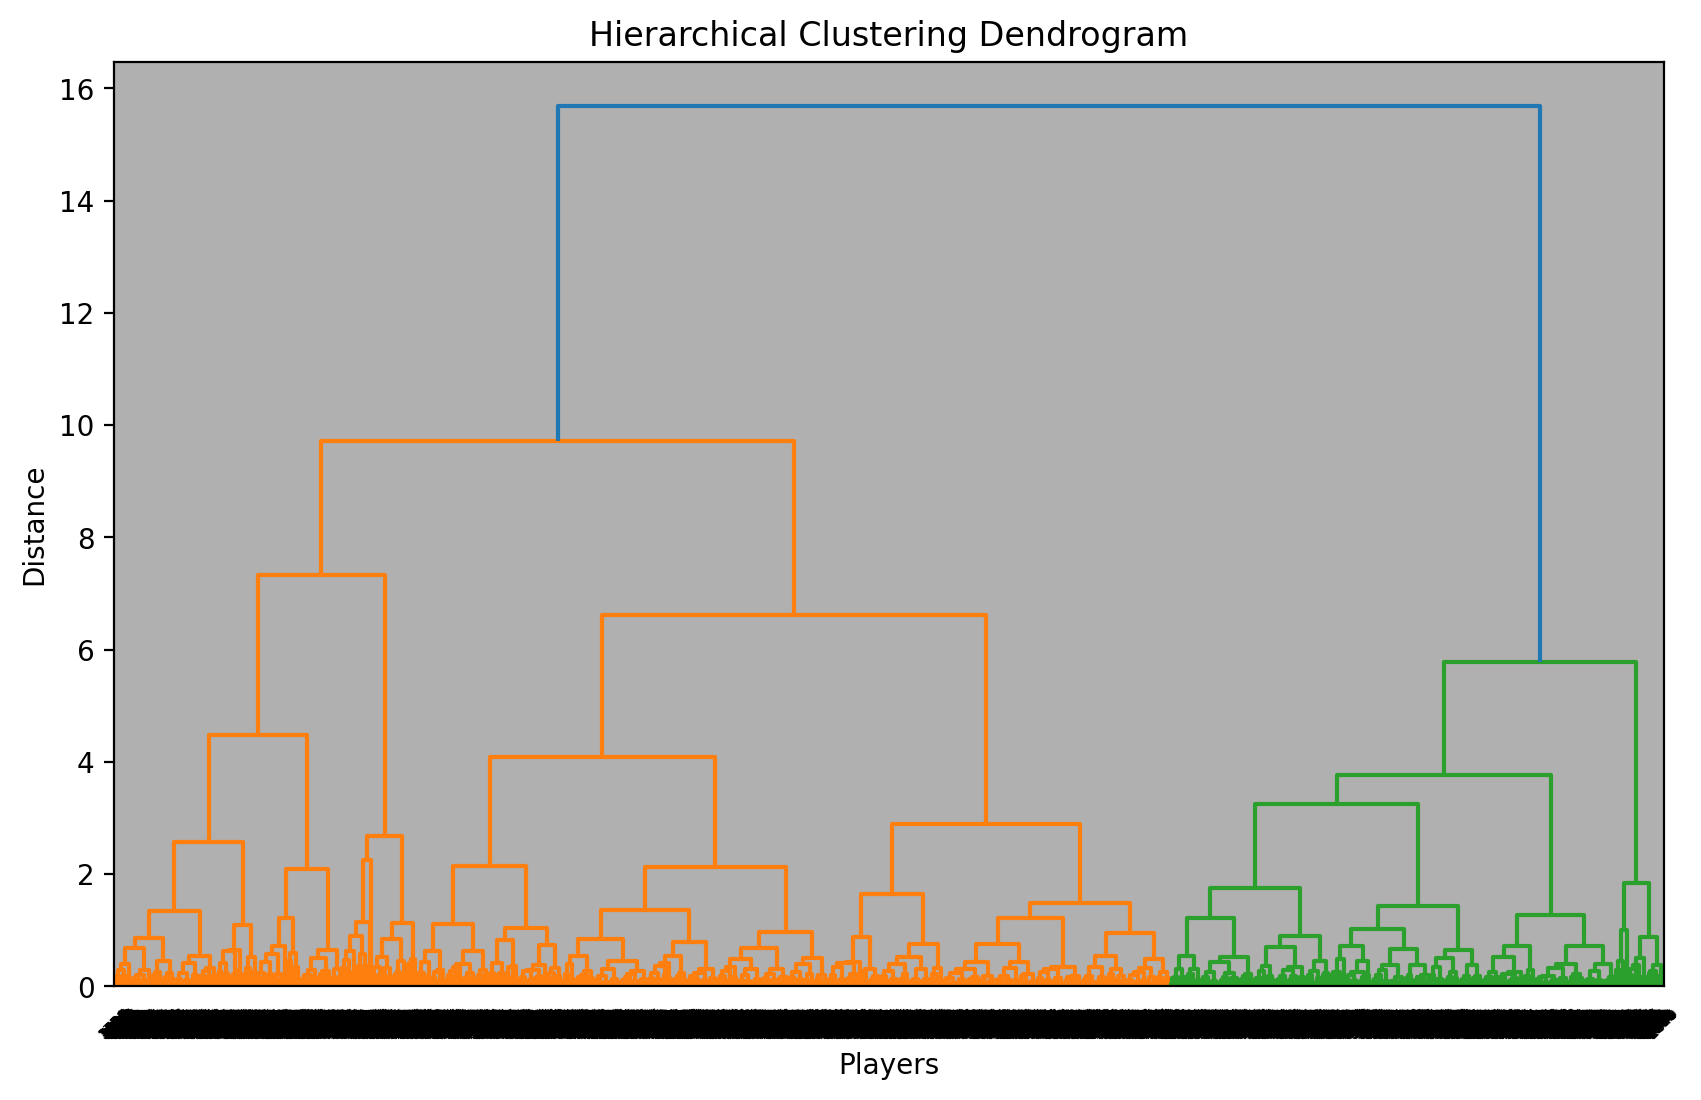

In [21]:
plt.figure(figsize=(10, 6), dpi=200)
linked = shc.linkage(data_per_player[['PTS/FGA', 'FG%', 'FGM', 'PTS', 'TRU%']], method='ward')
dendrogram = shc.dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Add annotations
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Players')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

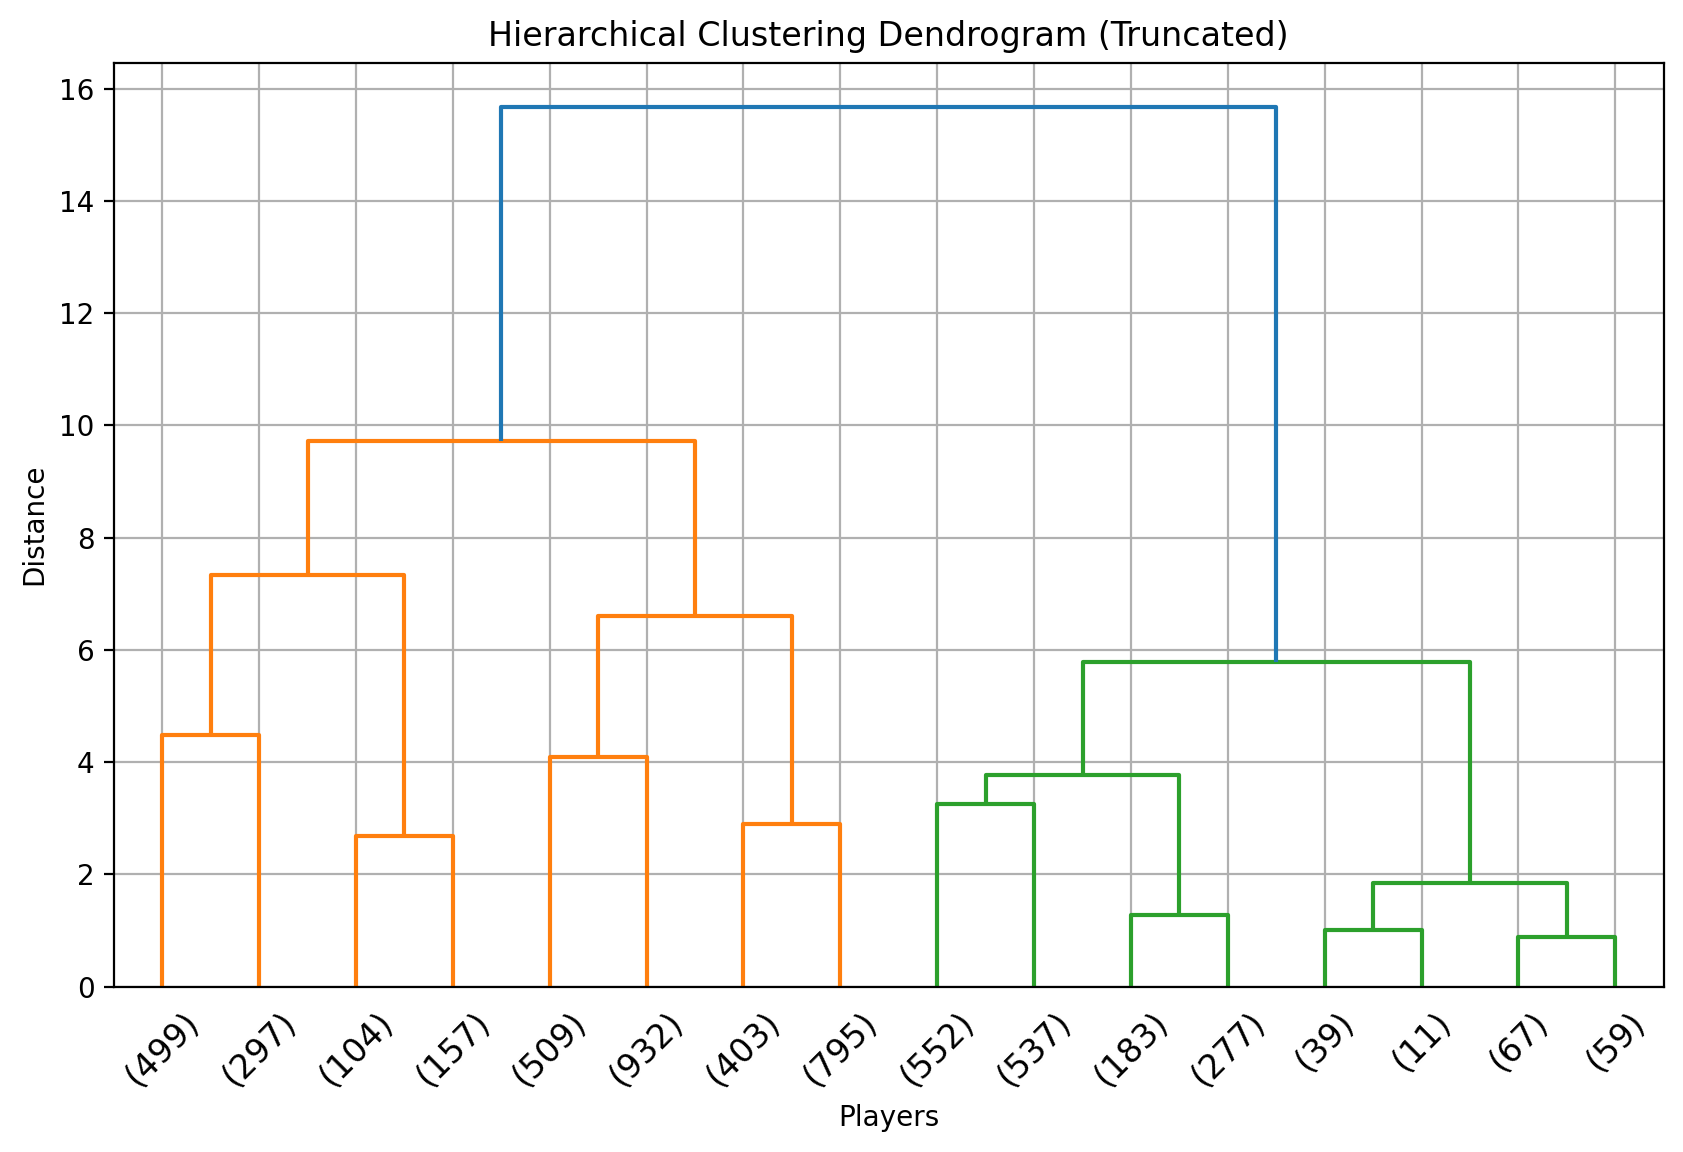

In [23]:
plt.figure(figsize=(10, 6), dpi=200)
shc.dendrogram(linked, orientation='top', distance_sort='descending', truncate_mode='level', p=3, labels=data_per_player.index, show_leaf_counts=True)

# Add annotations
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Players')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\himas\AppData\Local\Temp\ipykernel_13052\3839753615.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['cluster'] = cluster_labels


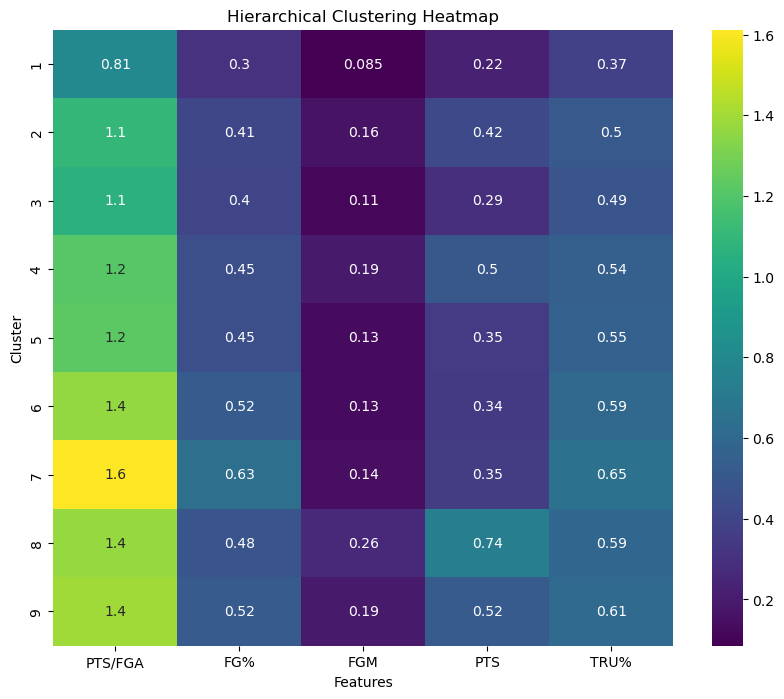

In [27]:
cluster_data = data_per_player[['PTS/FGA', 'FG%', 'FGM', 'PTS','TRU%']]


threshold_distance = 3.5  


cluster_labels = fcluster(linked, threshold_distance, criterion='distance')


cluster_data['cluster'] = cluster_labels

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_data.groupby('cluster').mean(), cmap='viridis', annot=True)
plt.title('Hierarchical Clustering Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

In [29]:
threshold_distance = 3.5  

# Cut the dendrogram to get cluster labels
cluster_labels = fcluster(linked, threshold_distance, criterion='distance')

# Assign cluster labels to the DataFrame
data_per_player['cluster'] = cluster_labels

# Display the DataFrame with cluster labels
print(data_per_player.head())

        PLAYER  PLAYER_ID     Year    MIN       FGM       FGA    FG_PCT  \
0  A.J. Lawson    1630639  2022-23  108.0  0.203704  0.407407  0.004630   
1  A.J. Lawson    1630639  2023-24  341.0  0.170088  0.381232  0.002610   
2     AJ Green    1631260  2022-23  345.0  0.153623  0.362319  0.001229   
3     AJ Green    1631260  2023-24  681.0  0.130690  0.311307  0.001172   
4     AJ Green    1631260  2024-25  507.0  0.128205  0.268245  0.000943   

       FG3M      FG3A   FG3_PCT       FTM       FTA    FT_PCT      OREB  \
0  0.092593  0.231481  0.003704  0.018519  0.074074  0.002315  0.055556   
1  0.043988  0.164223  0.001739  0.046921  0.073314  0.003378  0.043988   
2  0.127536  0.304348  0.001214  0.011594  0.011594  0.002899  0.017391   
3  0.104258  0.264317  0.000866  0.029369  0.032305  0.002783  0.013216   
4  0.116371  0.244576  0.000939  0.009862  0.011834  0.001643  0.007890   

       DREB       REB       AST       STL       BLK       TOV        PF  \
0  0.138889  0.194444  

In [31]:
features = data_per_player[['PTS/FGA', 'FG%', 'FGM', 'PTS','TRU%']]
# Compute the distance matrix
distance_matrix = pairwise_distances(features, metric='euclidean')

print(distance_matrix)


[[0.         0.1908169  0.12485318 ... 0.45706932 0.30109403 0.23754035]
 [0.1908169  0.         0.13825265 ... 0.64287496 0.48223599 0.35810623]
 [0.12485318 0.13825265 0.         ... 0.56054324 0.41175793 0.32587204]
 ...
 [0.45706932 0.64287496 0.56054324 ... 0.         0.1674368  0.36922842]
 [0.30109403 0.48223599 0.41175793 ... 0.1674368  0.         0.21724887]
 [0.23754035 0.35810623 0.32587204 ... 0.36922842 0.21724887 0.        ]]


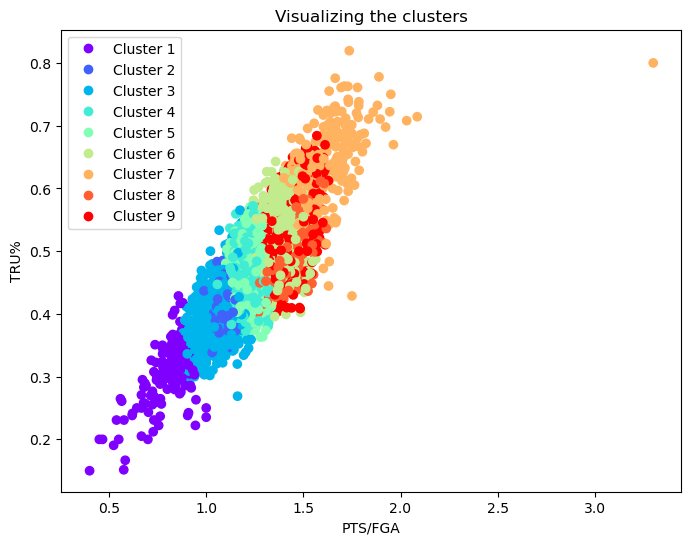

In [33]:
plt.figure(figsize=(8, 6))

# Scatter plot for clusters based on PTS/FGA and FG%
scatter = plt.scatter(data_per_player['PTS/FGA'], data_per_player['FG%'], c=data_per_player['cluster'], cmap='rainbow')
plt.xlabel('PTS/FGA')
plt.ylabel('TRU%')
plt.title('Visualizing the clusters')

# Add legend
legend_labels = [f'Cluster {i}' for i in range(1, max(data_per_player['cluster']) + 1)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

### KNN/ Non-Hierarchical Clustering

In [65]:
features=['FG_PCT', 'FG3_PCT', 'FT_PCT','AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

1 : 145.94256391980295
2 : 83.45946297880539
3 : 65.60321772775568
4 : 55.748602701083115
5 : 48.97212176916024
6 : 44.21008430417889
7 : 39.73916633038429
8 : 36.851983216860134
9 : 34.62666108685367


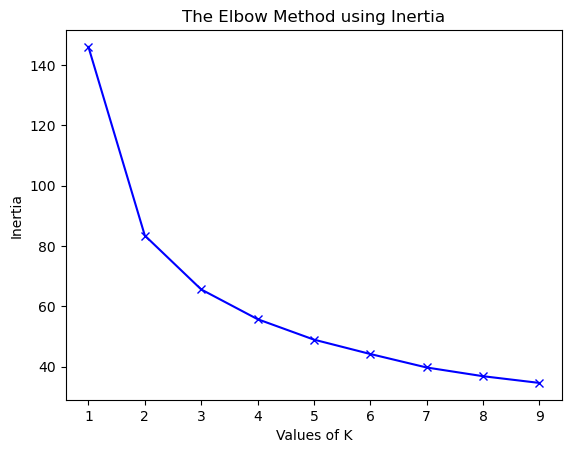

In [57]:

# Initialize list to store inertias
inertias = []
K = range(1, 10)

# Iterate over different values of k
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    inertias.append(kmeanModel.inertia_)
    
# Print the inertias
for clusters, inertia in zip(K, inertias):
    print(f'{clusters} : {inertia}')
    
# Plot the elbow method
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Silhouette score for k=2: 0.24412818615311305
Silhouette score for k=3: 0.2516006106966582
Silhouette score for k=4: 0.20649775097136983
Silhouette score for k=5: 0.15875266996279816
Silhouette score for k=6: 0.17725396292689152
Silhouette score for k=7: 0.15122587242264549
Silhouette score for k=8: 0.14550986322681916
Silhouette score for k=9: 0.13662756998064013
Silhouette score for k=10: 0.12302731747481116
Silhouette score for k=11: 0.12275050813844254
Silhouette score for k=12: 0.121317445158229


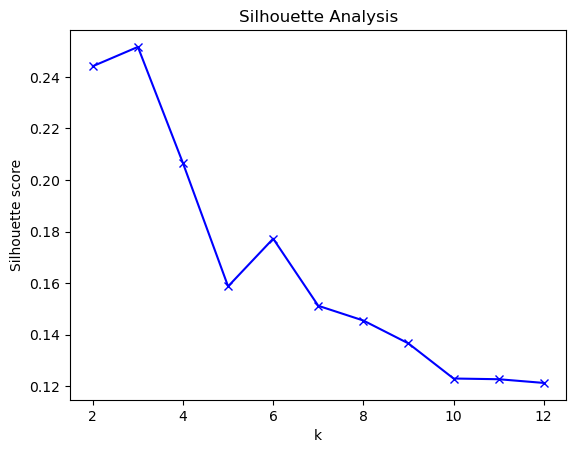

In [58]:
# Perform silhouette analysis
sil_scores = []
K = range(2, 13)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    sil_scores.append(sil_score)
    print(f"Silhouette score for k={k}: {sil_score}")

# Plot silhouette scores
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis')
plt.show()

In [61]:
def kmeans_clustering(df, x_col, y_col,m):

    X = df[[x_col, y_col]].values

    kmeans = KMeans(n_clusters= m ,n_init=10).fit(X)
    centroids = kmeans.cluster_centers_
    print("********************Centroids***********************")
    print(centroids)

    df['cluster'] = kmeans.labels_.astype(str)
    print("********************count of data points in each cluster***********************")
    print(df.cluster.value_counts())
    print("*******************************************")
# Plot the clusters using Plotly
    fig = pex.scatter(df, x=x_col, y=y_col, color='cluster', height = 750,width= 1000,
    category_orders={'cluster': [str(i) for i in range(5)]})
    fig.add_trace(go.Scatter(x=centroids[:, 0], y=centroids[:, 1], mode='markers',
                             marker=dict(symbol='star',color="black", size=10), name="centroids"))
    fig.show()
     # Separate data points for each cluster
    df['Cluster'] = kmeans.labels_

    # Display the number of members in each cluster
    cluster_counts = df['Cluster'].value_counts()
    print("Number of clusters and their members:")
    print(cluster_counts)

    plt.figure(figsize=(12, 8))
    for cluster in range(m):
        cluster_data = df[df['Cluster'] == cluster]
        plt.plot(cluster_data[features].mean(), marker='o', label=f'Cluster {cluster}')
    plt.title('Cluster Analysis')
    plt.xlabel('Features')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


********************Centroids***********************
[[8.32097382e-04 4.41777349e-01]
 [1.12906375e-03 2.93417068e-01]
 [5.85400795e-04 6.42626785e-01]]
********************count of data points in each cluster***********************
cluster
0    2354
1    2240
2     827
Name: count, dtype: int64
*******************************************


C:\Users\himas\AppData\Local\Temp\ipykernel_13052\1703806563.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



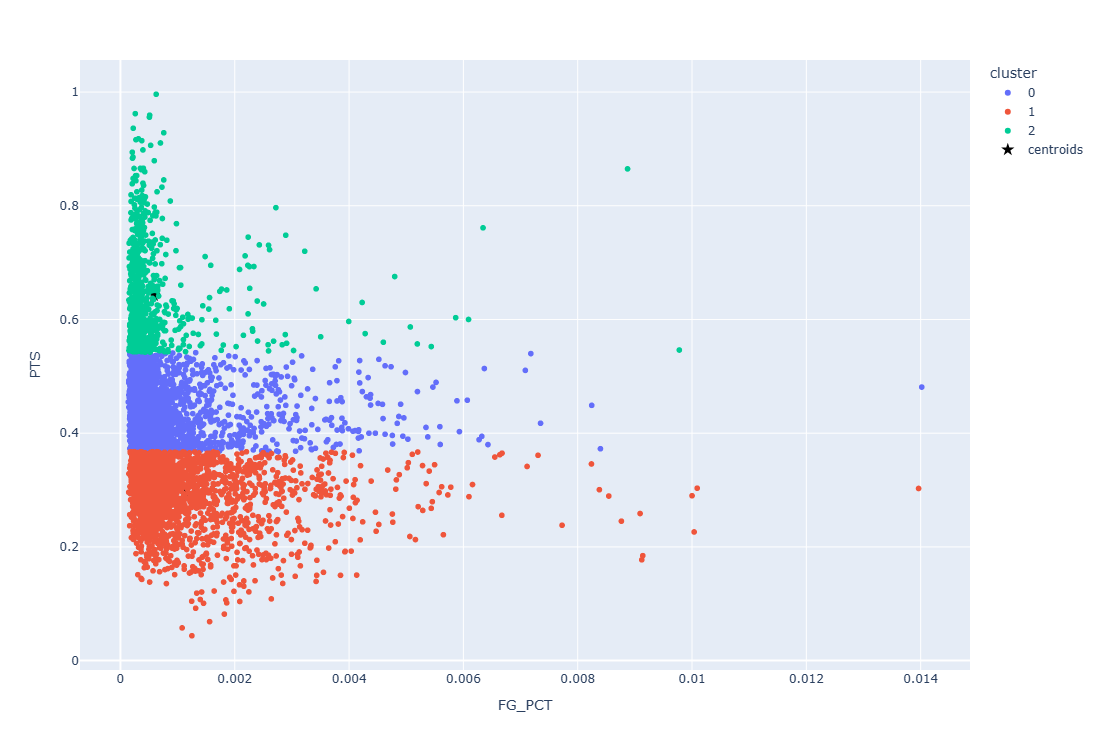

C:\Users\himas\AppData\Local\Temp\ipykernel_13052\1703806563.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Number of clusters and their members:
Cluster
0    2354
1    2240
2     827
Name: count, dtype: int64


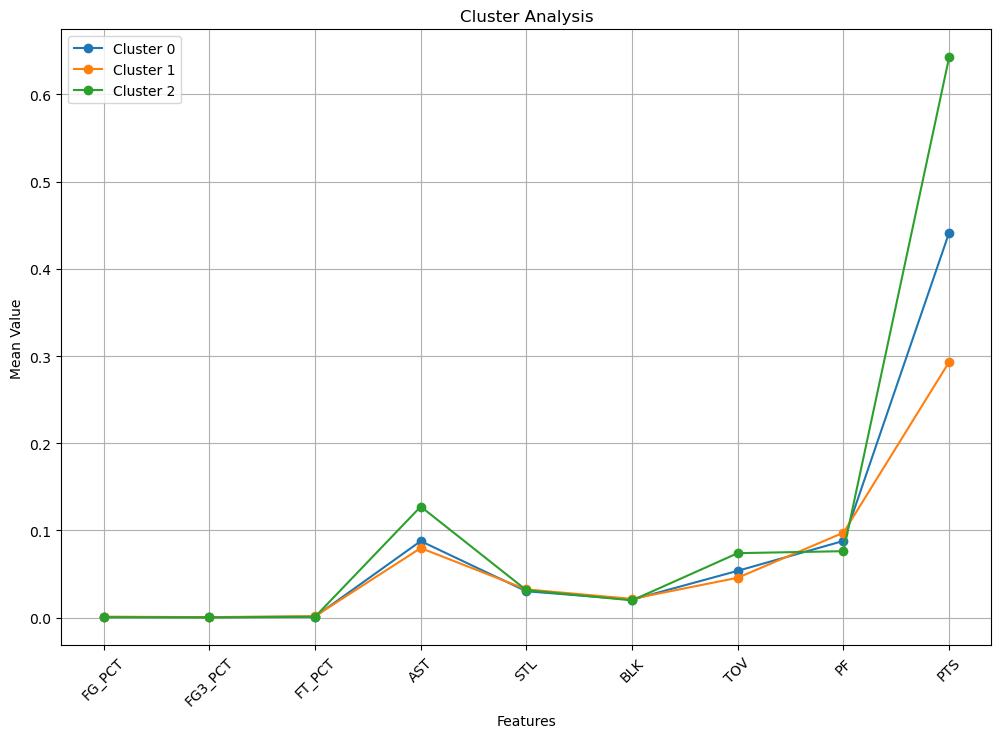

In [67]:
kmeans_clustering(X,'FG_PCT', 'PTS',3 )

In [69]:
distance_matrix = pairwise_distances(X_scaled, metric='euclidean')

# Print the distance matrix
print("Distance matrix:")
print(distance_matrix)

Distance matrix:
[[0.         3.89736333 4.9054098  ... 7.96734662 8.10755735 6.95119255]
 [3.89736333 0.         2.27151331 ... 5.67379778 5.55582904 5.63550685]
 [4.9054098  2.27151331 0.         ... 5.79610552 5.46681273 6.44930599]
 ...
 [7.96734662 5.67379778 5.79610552 ... 0.         1.21897583 3.82659081]
 [8.10755735 5.55582904 5.46681273 ... 1.21897583 0.         4.43462225]
 [6.95119255 5.63550685 6.44930599 ... 3.82659081 4.43462225 0.        ]]
